In [2]:
import pandas as pd

## Load Dataset

In [5]:
book = pd.read_csv("C:/Users/GC/Desktop/2021/연구/장기베스트셀러/데이터/Bestseller_Fiction.csv", encoding="cp949")

print(book.shape)
book.head()

(148, 17)


,BestsellerFic,Genre,GenreBin,Title,Author,Published Year,Publisher,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Duration,변경전Duration,변경후Duration3(0=S1=L2=etc),Impact,year_rank,isGlobal50 of first year(False=0True=1)
0,2020,Literature&Fiction,6,Where the Crawdads Sing,Delia Owens,2017,G.P. Putnam's Sons,209,26.00,1,1,3,1,1,53800.0000,2019_01,1
1,2020,Literature&Fiction,6,The Silent Patient,Alex Michaelides,2019,Celadon Books,336,26.99,0,1,2(2019),2,1,23700.0000,2019_39,1
2,2020,Literature&Fiction,6,Then She Was Gone,Lisa Jewell,2018,Atria Books,384,16.00,1,1,2(2019),2,1,38620.0298,2019_90,1
3,2020,Teen&Youngadult,6,To Kill a Mockingbird,Harper Lee,2005,Harper Perennial,336,15.99,1,0,7,1,1,400958.9970,2019_41,1
4,2020,Teen&Youngadult,6,The Outsiders,S. E. Hinton,2006,Speak,224,10.99,1,1,5,1,1,133000.0000,2019_99,1


## Preprocessing

### column filter

사용할 columns을 선정

In [6]:
book.columns

Index(['BestsellerFic', 'Genre', 'GenreBin', 'Title', 'Author',
       'Published Year', 'Publisher', 'Page', 'Price',
       'authorgender(male0fe1team2)', 'isFirstBestSeller', 'Duration',
       '변경전Duration', '변경후Duration3(0=S1=L2=etc)', 'Impact', 'year_rank',
       'isGlobal50 of first year(False=0True=1)'],
      dtype='object')

In [7]:
col_names = ['Published Year', 'Publisher', 'Page', 'Price',
       'authorgender(male0fe1team2)', 'isFirstBestSeller', '변경후Duration3(0=S1=L2=etc)', 'Impact', 'isGlobal50 of first year(False=0True=1)']

In [8]:
book = book[col_names]

print(book.shape)
book.head()

(148, 9)


,Published Year,Publisher,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,변경후Duration3(0=S1=L2=etc),Impact,isGlobal50 of first year(False=0True=1)
0,2017,G.P. Putnam's Sons,209,26.00,1,1,1,53800.0000,1
1,2019,Celadon Books,336,26.99,0,1,1,23700.0000,1
2,2018,Atria Books,384,16.00,1,1,1,38620.0298,1
3,2005,Harper Perennial,336,15.99,1,0,1,400958.9970,1
4,2006,Speak,224,10.99,1,1,1,133000.0000,1


### Encode Sex

데이터 값을 수치적으로 변경해줘야 분석에 사용 가능

In [6]:
# 성별(Sex) 값이 Male인 열을 0, Female인 열을 1로 수정
#titanic.loc[titanic["Sex"] == "Male", "Sex"] = 0
#titanic.loc[titanic["Sex"] == "Female", "Sex"] = 1

#print(titanic.shape)
#titanic.head()

(1309, 8)


,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,First,1,29.0,0.0,0.0,211.3,Southampton,Yes
1,First,0,0.9,1.0,2.0,151.6,Southampton,Yes
2,First,1,2.0,1.0,2.0,151.6,Southampton,No
3,First,0,30.0,1.0,2.0,151.6,Southampton,No
4,First,1,25.0,1.0,2.0,151.6,Southampton,No


### Encode Passenger Class

In [7]:
# 등급(Passenger Class) 값이 First, Second, Third인 열을 각각 1, 2, 3으로 수정
#titanic.loc[titanic["Passenger Class"] == "First", "Passenger Class"] = 1
#titanic.loc[titanic["Passenger Class"] == "Second", "Passenger Class"] = 2
#titanic.loc[titanic["Passenger Class"] == "Third", "Passenger Class"] = 3

#print(titanic.shape)
#titanic.head()

(1309, 8)


,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,1,1,29.0,0.0,0.0,211.3,Southampton,Yes
1,1,0,0.9,1.0,2.0,151.6,Southampton,Yes
2,1,1,2.0,1.0,2.0,151.6,Southampton,No
3,1,0,30.0,1.0,2.0,151.6,Southampton,No
4,1,1,25.0,1.0,2.0,151.6,Southampton,No


# Fill in missing values

In [17]:
titanic = pd.concat([titanic, pd.get_dummies(titanic['Port of Embarkation'])], axis=1)

print(titanic.shape)
titanic.head()

(1307, 11)


,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived,Cherbourg,Queenstown,Southampton
0,1,1,29.0,0.0,0.0,211.3,Southampton,Yes,0,0,1
1,1,0,0.9,1.0,2.0,151.6,Southampton,Yes,0,0,1
2,1,1,2.0,1.0,2.0,151.6,Southampton,No,0,0,1
3,1,0,30.0,1.0,2.0,151.6,Southampton,No,0,0,1
4,1,1,25.0,1.0,2.0,151.6,Southampton,No,0,0,1


### Encode Survived

In [18]:
#titanic['Survived'] = pd.Categorical(titanic['Survived'], categories=['No', 'Yes'])

In [19]:
#titanic['Survived']  = titanic['Survived'].cat.codes
#titanic['Survived']

0       1
1       1
2       0
3       0
4       0
       ..
1302    0
1303    0
1304    0
1305    0
1306    0
Name: Survived, Length: 1307, dtype: int8

## Partitioning

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
book.columns

Index(['Published Year', 'Publisher', 'Page', 'Price',
       'authorgender(male0fe1team2)', 'isFirstBestSeller',
       '변경후Duration3(0=S1=L2=etc)', 'Impact',
       'isGlobal50 of first year(False=0True=1)'],
      dtype='object')

In [67]:
cols_for_train = ['Published Year', 'Page', 'Price',
       'authorgender(male0fe1team2)', 'isFirstBestSeller', 'Impact',
       'isGlobal50 of first year(False=0True=1)']


X = book[cols_for_train]
y = book['변경후Duration3(0=S1=L2=etc)']

In [68]:
import numpy as np
book[:] = np.nan_to_num(book)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [128]:
print(X_train.shape)
X_train.head()

(118, 7)


,Published Year,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Impact,isGlobal50 of first year(False=0True=1)
100,2012.0,224.0,15.99,0.0,1.0,17573.88512,1.0
61,2014.0,369.0,12.99,0.0,1.0,93500.00000,1.0
109,2014.0,1408.0,38.97,1.0,0.0,172763.80000,1.0
74,2010.0,320.0,7.99,1.0,1.0,23067.44857,1.0
24,2017.0,523.0,16.99,0.0,1.0,716815.78590,0.0


In [129]:
print(X_test.shape)
X_test.head()

(30, 7)


,Published Year,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Impact,isGlobal50 of first year(False=0True=1)
26,2019.0,464.0,16.99,0.0,1.0,1.099890e+07,1.0
101,2012.0,1625.0,19.70,1.0,1.0,1.259419e+08,1.0
17,2017.0,464.0,18.99,1.0,1.0,3.820000e+06,1.0
65,2013.0,5216.0,49.95,0.0,0.0,3.736820e+05,1.0
42,2019.0,320.0,14.99,0.0,0.0,4.103000e+08,1.0


In [130]:
print(y_train.shape)
y_train.head()

(118,)


100    0
61     0
109    1
74     0
24     1
Name: 변경후Duration3(0=S1=L2=etc), dtype: int64

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
X_train[:] = np.nan_to_num(X_train)
y_train[:] = np.nan_to_num(y_train)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [133]:
print(model.score(X_train, y_train))

0.711864406779661


In [134]:
X_test[:] = np.nan_to_num(X_test)

predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:93]

(30,)


array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [135]:
print(model.score(X_test, y_test))

0.7333333333333333


In [136]:
print(model.coef_)

#'Published Year', 'Page', 'Price','authorgender(male0fe1team2)', 'isFirstBestSeller', 'Impact', 'isGlobal50 of first year(False=0True=1)']


[[-0.02017366  0.36842741  0.06891238 -0.03737091  0.26503852  0.3827711
   0.21003877]]


In [137]:
from sklearn.metrics import confusion_matrix

conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions), 
                          columns=['pred_No', 'pred_yes'],
                          index=['true_No', 'true_yes'])

conf_matrix

,pred_No,pred_yes
true_No,19,1
true_yes,7,3


### ROC curve

In [138]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [139]:
model.predict_proba(X_test)

array([[0.59631801, 0.40368199],
       [0.25085958, 0.74914042],
       [0.62103281, 0.37896719],
       [0.12461803, 0.87538197],
       [0.13711648, 0.86288352],
       [0.62271275, 0.37728725],
       [0.65795397, 0.34204603],
       [0.72938721, 0.27061279],
       [0.71823972, 0.28176028],
       [0.74775356, 0.25224644],
       [0.71541457, 0.28458543],
       [0.55946634, 0.44053366],
       [0.520949  , 0.479051  ],
       [0.72950232, 0.27049768],
       [0.74267025, 0.25732975],
       [0.62989193, 0.37010807],
       [0.74337358, 0.25662642],
       [0.64381496, 0.35618504],
       [0.65407253, 0.34592747],
       [0.81071782, 0.18928218],
       [0.81854344, 0.18145656],
       [0.74670831, 0.25329169],
       [0.10709446, 0.89290554],
       [0.70832361, 0.29167639],
       [0.61309854, 0.38690146],
       [0.77431715, 0.22568285],
       [0.76052937, 0.23947063],
       [0.8469376 , 0.1530624 ],
       [0.70575629, 0.29424371],
       [0.72903997, 0.27096003]])

ROC AUC: 0.755


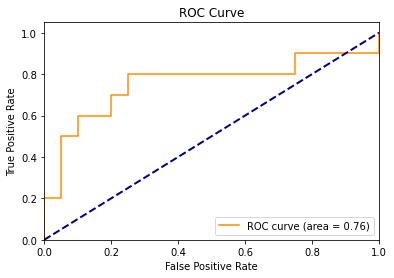

In [140]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [141]:
fpr

array([0.  , 0.  , 0.  , 0.05, 0.05, 0.1 , 0.1 , 0.2 , 0.2 , 0.25, 0.25,
       0.75, 0.75, 1.  , 1.  ])

In [142]:
tpr

array([0. , 0.1, 0.2, 0.2, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9,
       0.9, 1. ])

### Accuracy

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [144]:
print(f'Accuracy: {accuracy_score(y_test, predictions):0.3f}')
print(f'Precision: {precision_score(y_test, predictions):0.3f}')
print(f'Recall: {recall_score(y_test, predictions):0.3f}')
print(f'f1: {f1_score(y_test, predictions):0.3f}')

Accuracy: 0.733
Precision: 0.750
Recall: 0.300
f1: 0.429


In [145]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
import numpy

X[:] = np.nan_to_num(X)
y[:] = np.nan_to_num(y)

kfold = StratifiedKFold(n_splits=5)
cross_val_score(model, X, y, scoring="accuracy", cv=kfold)

<ipython-input-145-672599b064c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = np.nan_to_num(X)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._setitem_slic

array([0.33333333, 0.33333333, 0.66666667, 0.34482759, 0.68965517])

In [146]:
cross_val_score(model, X, y, scoring="precision", cv=kfold)

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.33333333, 0.33333333, 0.        , 0.32142857, 0.        ])

In [147]:
cross_val_score(model, X, y, scoring="recall", cv=kfold)

array([1., 1., 0., 1., 0.])

In [148]:
cross_val_score(model, X, y, scoring="f1", cv=kfold)

array([0.5       , 0.5       , 0.        , 0.48648649, 0.        ])